# Creating a `Population`

The first step in using `coalestr` is to specify the history of transmission parameters of the parasite population that we want to simulate. The simplest way to format the transmission history is as a list of lists:

`my_history = [[D, N, Q, X, M], [D, N, Q, X, M], [D, N, Q, X, M]]`

Each inner list gives the transmission parameters for a period of population history.  The first inner list describes the transmission parameters for the first period, the second inner list describes the second period, and so on. In this example there are three periods of population history, but we can expand this to as many periods as we like.
  
Each period of population history is described by five variables:

* `D` - duration of the period in generations
* `N` - effective number of hosts $N_h$
* `Q` - quantum of transmission $Q$
* `X` - crossing rate of transmission chains $\chi$
* `M` - migration rate from a metapopulation $N_m$.  

For a simple population without migration `M` is zero. It is non-zero only if this is a subpopulation that receives migrants from a larger metapopulation [as described elsewhere](create-subpopulation.ipynb).

We create a simple population without migration like this:

`my_population = coalestr.Population(my_history)`

This creates an instance of the `Population` class called `my_population` with the given set of transmission parameters.

In [ ]:
!pip install coalestr
from coalestr import cs

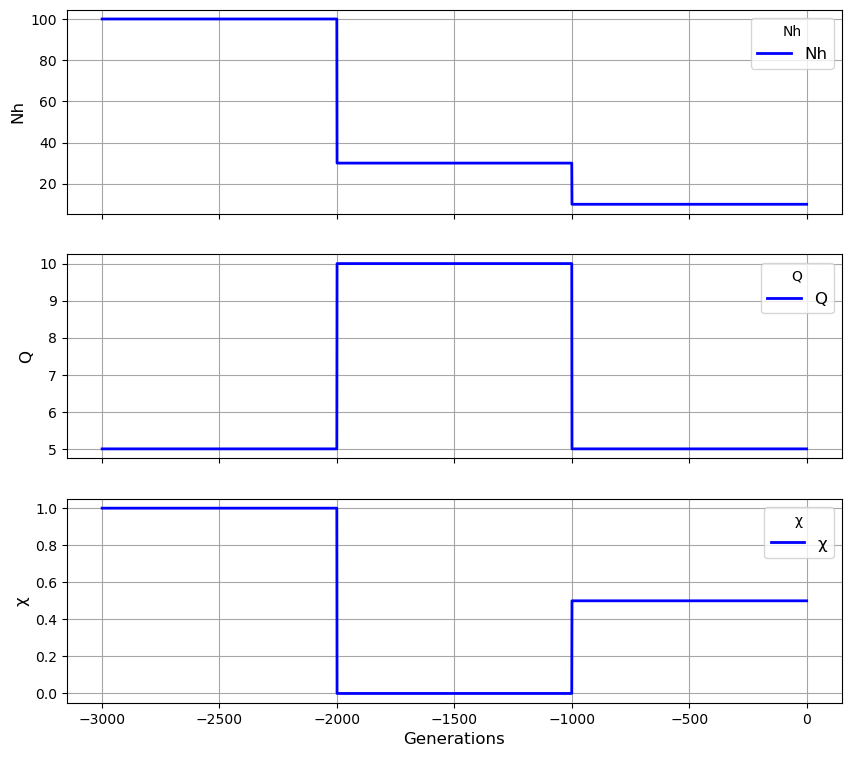

In [20]:
# We specify the transmission history as a list of lists
# Each inner list corresponds to a period of history ..
# .. and has the format [duration, N, Q, X, M]
# In this case there are three periods each of 1000 generations

my_history = [[1000, 100, 5, 1, 0], [1000, 30, 10, 0, 0], [1000, 10, 5, 0.5, 0]]

# We use the history to create an instance of the Population class:

my_population = cs.Population(my_history)

# We can visualise the transmission history:

my_population.plot_history()

# Population attributes

Each population has a set of attributes such as rates of mutation and recombination.  These are given the following default values when creating a population but they can be modified at any stage.

* mu = 1.1e-8 (single nucleotide substitution rate)
* r = 7.4e-4 (locus scaled recombination rate per kb)
* v = 9e-5 (locus scaled mutation rate per kb)
* locus_kb = 27 (length of haplotype locus in kb)
* phi_seed = 0.2 (initialise effective recombination parameter $\phi$)

In [4]:
# What is the single nucleotide substition rate of my_population?

my_population.mu

1.1e-08

In [5]:
# What is the locus scaled recombination rate of my_population?

my_population.r

0.00074

In [6]:
# Show all the population settings

my_population.show_settings()

mu 1.100e-08, 
r 7.400e-04, 
v 9.000e-05, 
locus_kb 27.00
unit_length 13.50, 
chromosome_length 100, 
minimum_length 2


In [9]:
# Modify the mutation and recombination rates

my_population.mu = 5e-07
my_population.r = 6.3e-03

# Check the new values

my_population.show_settings()

mu 5.000e-07, 
r 6.300e-03, 
v 9.000e-05, 
locus_kb 27.00
unit_length 13.50, 
chromosome_length 100, 
minimum_length 2


In [10]:
# Restore the default settings

my_population.restore_settings()
my_population.show_settings()

mu 1.100e-08, 
r 7.400e-04, 
v 9.000e-05, 
locus_kb 27.00
unit_length 13.50, 
chromosome_length 100, 
minimum_length 2


# Population methods

There are various methods that can be performed on a Population object such as `my_population`.  These include simple descriptors of the population such as `plot_history` and `show_settings` as demonstrated above.

As described elsewhere there are also methods:

* to [perform a coalescent simulation](get-coalescent.ipynb) using `get_coalescent` 
* to [obtain nucleotide diversity and haplotype homozygosity](get-diversity.ipynb) using `get_diversity`

The `get_coalescent` and `get_diversity` methods generate data arrays that become attributes of `my_population`, e.g. describing time series of coalescence and genetic diversity

# Complex transmission histories

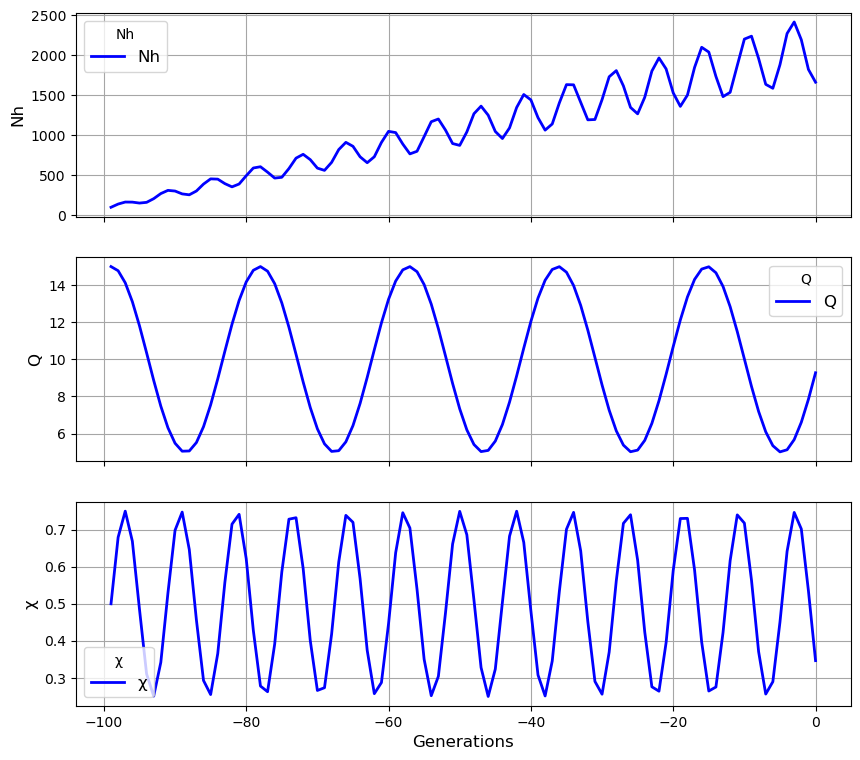

In [15]:
# For more complex transmission histories
# .. that cannot be easily represented by a list of lists 
# .. we can instead create an array of transmission parameters 
# .. where axis 0 represents forward time

import numpy
import math

duration_of_simulation = 100
my_history = numpy.ones((duration_of_simulation, 4))

N = 100 # Nh baseline
Q = 10  # Q baseline
X = 0.5 # chi baseline
M = 0

for t in range(duration_of_simulation):
    
    my_history[t, 0] = N * (1 + 0.2 * math.sin(t))
    my_history[t, 1] = Q * (1 + 0.5 * math.cos(0.3 * t))
    my_history[t, 2] = X * (1 + 0.5 * math.sin(0.8 * t))
    my_history[t, 3] = M
    
    N += 20
    
# We create a population with this transmission history
    
my_population = cs.Population(my_history)

# We plot the transmission history

my_population.plot_history()